<a href="https://colab.research.google.com/github/LeoWest7/Prueba-n1-Daniel-Andrade-001/blob/main/Evaluacion_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importacion de las librerias necesarias para EDA


In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

Cargar el csv para hacer el analisis de datos


In [14]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  name=fn
  df=pd.read_csv(name, sep = '\t')

Saving marketing_campaign (1).csv to marketing_campaign (1).csv


Vemos los datos generales con describe

In [15]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Ver los primeros 5 datos

In [16]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Datos numericos:

In [18]:
df[["ID","Income","Kidhome","Teenhome","Recency","MntWines","Year_Birth"]]

,ID,Income,Kidhome,Teenhome,Recency,MntWines,Year_Birth
0,5524,58138.0,0,0,58,635,1957
1,2174,46344.0,1,1,38,11,1954
2,4141,71613.0,0,0,26,426,1965
3,6182,26646.0,1,0,26,11,1984
4,5324,58293.0,1,0,94,173,1981
...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,1967
2236,4001,64014.0,2,1,56,406,1946
2237,7270,56981.0,0,0,91,908,1981
2238,8235,69245.0,0,1,8,428,1956


Datos Categoricos "Response: 0=NO 1=SI si respondio a la campaña :

In [19]:
df[["Education","Marital_Status","Complain","Response"]]

,Education,Marital_Status,Complain,Response
0,Graduation,Single,0,1
1,Graduation,Single,0,0
2,Graduation,Together,0,0
3,Graduation,Together,0,0
4,PhD,Married,0,0
...,...,...,...,...
2235,Graduation,Married,0,0
2236,PhD,Together,0,0
2237,Graduation,Divorced,0,0
2238,Master,Together,0,0


Calculos de medidas de tendencia central "moda, media y mediana"

Media:

In [22]:
columnas_numericas = df.select_dtypes(include=np.number)
media = columnas_numericas.mean()
tabla_media = media.to_frame().rename(columns={0: 'Media'})
print(tabla_media)


                            Media
ID                    5592.159821
Year_Birth            1968.805804
Income               52247.251354
Kidhome                  0.444196
Teenhome                 0.506250
Recency                 49.109375
MntWines               303.935714
MntFruits               26.302232
MntMeatProducts        166.950000
MntFishProducts         37.525446
MntSweetProducts        27.062946
MntGoldProds            44.021875
NumDealsPurchases        2.325000
NumWebPurchases          4.084821
NumCatalogPurchases      2.662054
NumStorePurchases        5.790179
NumWebVisitsMonth        5.316518
AcceptedCmp3             0.072768
AcceptedCmp4             0.074554
AcceptedCmp5             0.072768
AcceptedCmp1             0.064286
AcceptedCmp2             0.013393
Complain                 0.009375
Z_CostContact            3.000000
Z_Revenue               11.000000
Response                 0.149107


Mediana:

In [23]:
columnas_numericas = df.select_dtypes(include=np.number)
mediana = columnas_numericas.median()
tabla_mediana = mediana.to_frame().rename(columns={0: 'Mediana'})
print(tabla_mediana)

                     Mediana
ID                    5458.5
Year_Birth            1970.0
Income               51381.5
Kidhome                  0.0
Teenhome                 0.0
Recency                 49.0
MntWines               173.5
MntFruits                8.0
MntMeatProducts         67.0
MntFishProducts         12.0
MntSweetProducts         8.0
MntGoldProds            24.0
NumDealsPurchases        2.0
NumWebPurchases          4.0
NumCatalogPurchases      2.0
NumStorePurchases        5.0
NumWebVisitsMonth        6.0
AcceptedCmp3             0.0
AcceptedCmp4             0.0
AcceptedCmp5             0.0
AcceptedCmp1             0.0
AcceptedCmp2             0.0
Complain                 0.0
Z_CostContact            3.0
Z_Revenue               11.0
Response                 0.0


Moda:

In [27]:
moda = df.mode(numeric_only=True).iloc[0]
print("\nModa"),moda


Moda


(None,
 ID                        0.0
 Year_Birth             1976.0
 Income                 7500.0
 Kidhome                   0.0
 Teenhome                  0.0
 Recency                  56.0
 MntWines                  2.0
 MntFruits                 0.0
 MntMeatProducts           7.0
 MntFishProducts           0.0
 MntSweetProducts          0.0
 MntGoldProds              1.0
 NumDealsPurchases         1.0
 NumWebPurchases           2.0
 NumCatalogPurchases       0.0
 NumStorePurchases         3.0
 NumWebVisitsMonth         7.0
 AcceptedCmp3              0.0
 AcceptedCmp4              0.0
 AcceptedCmp5              0.0
 AcceptedCmp1              0.0
 AcceptedCmp2              0.0
 Complain                  0.0
 Z_CostContact             3.0
 Z_Revenue                11.0
 Response                  0.0
 Name: 0, dtype: float64)

Usando Boxplot por variable:

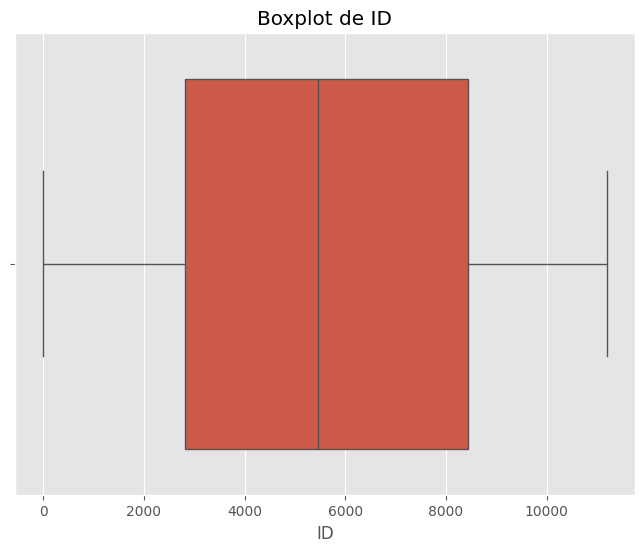

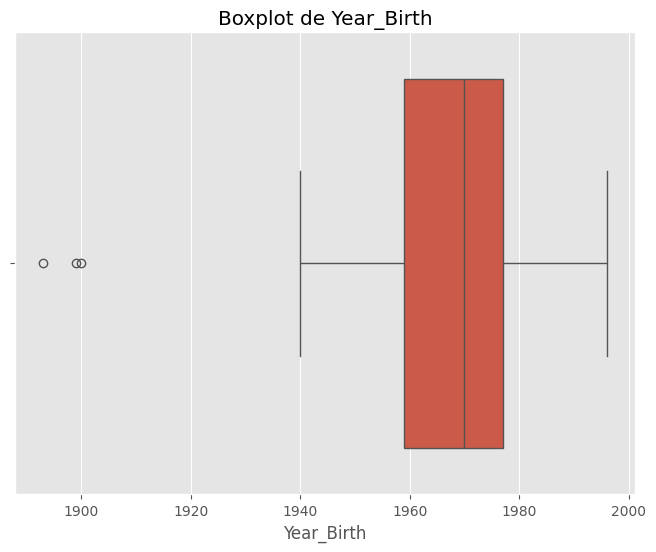

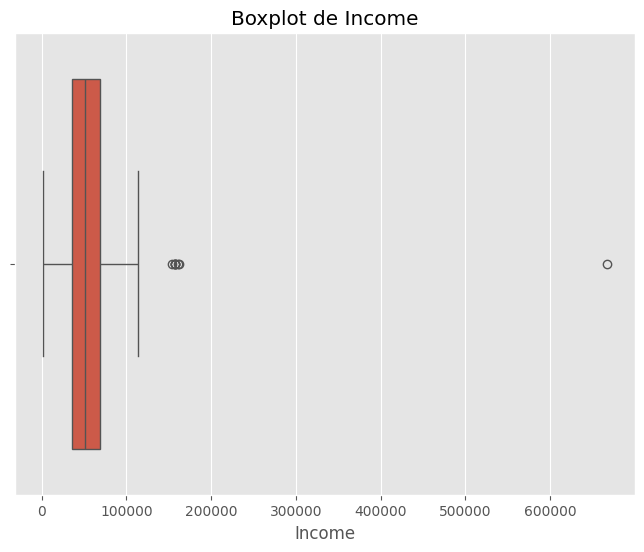

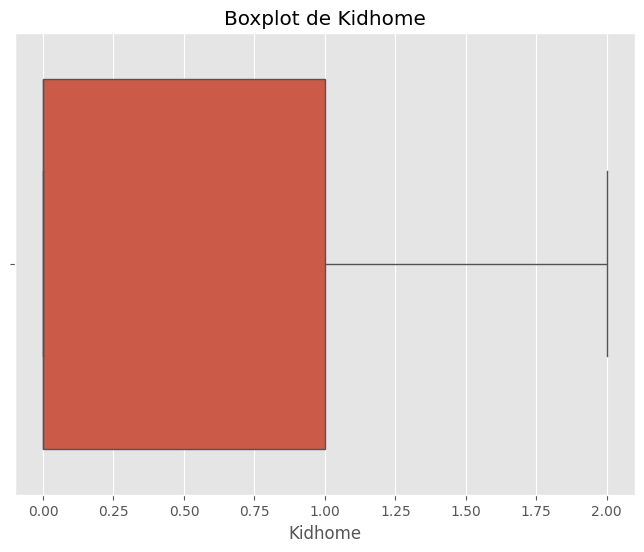

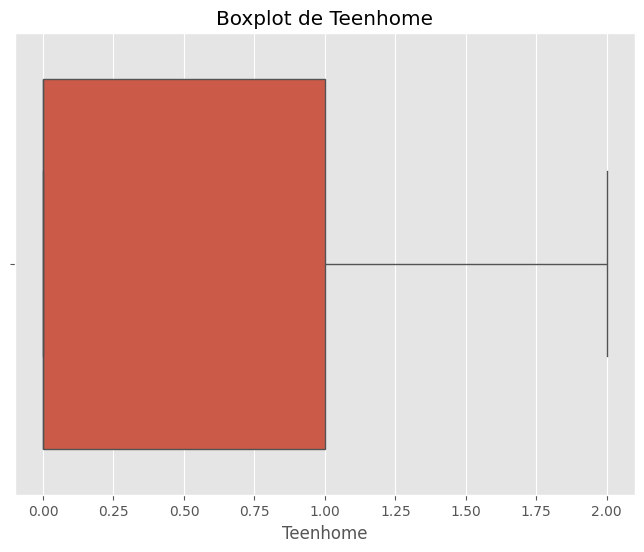

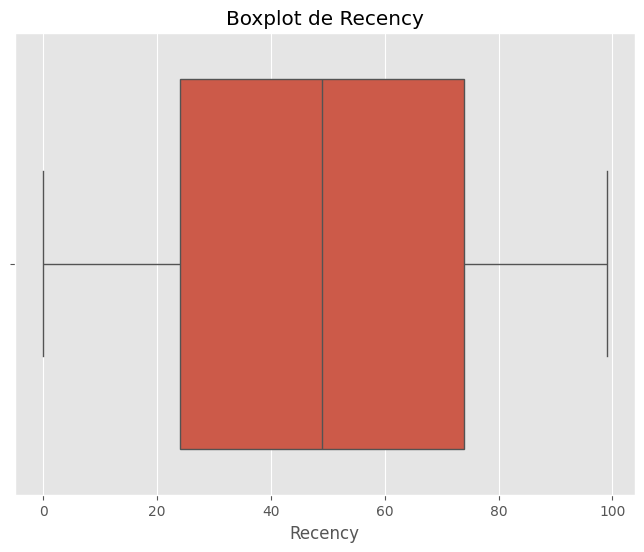

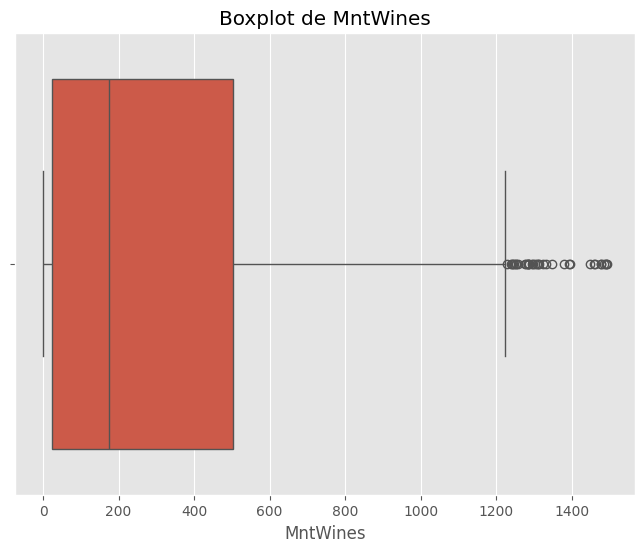

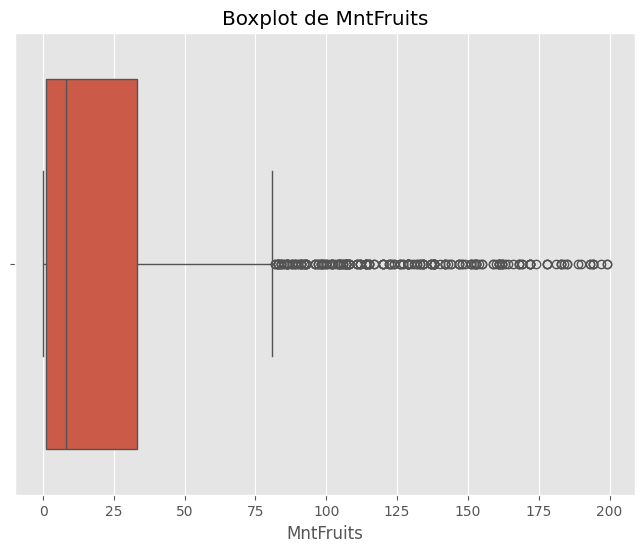

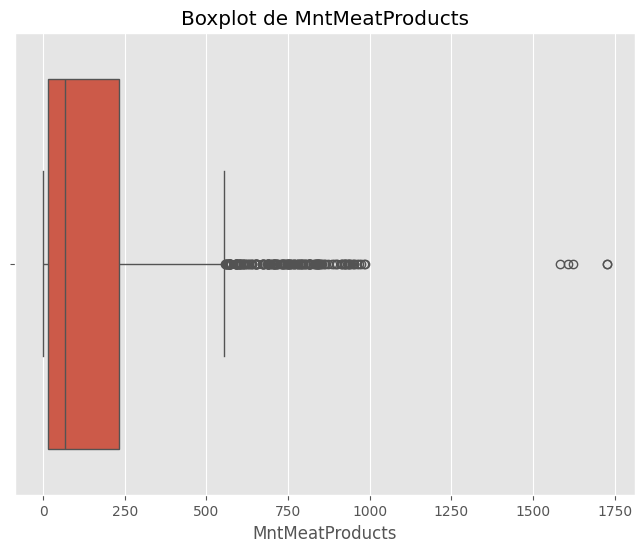

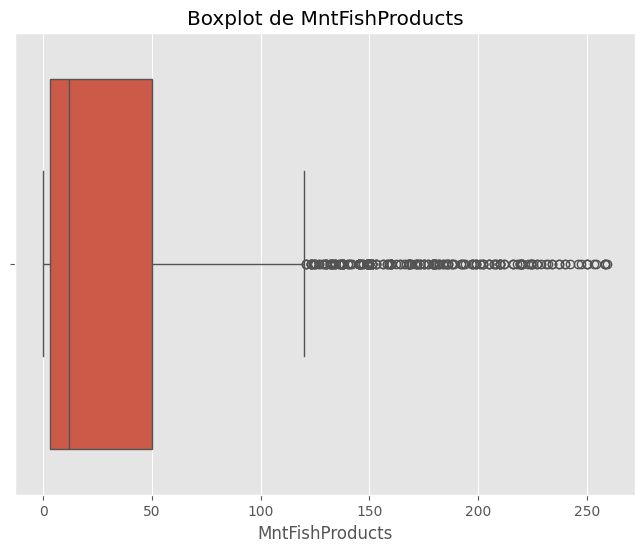

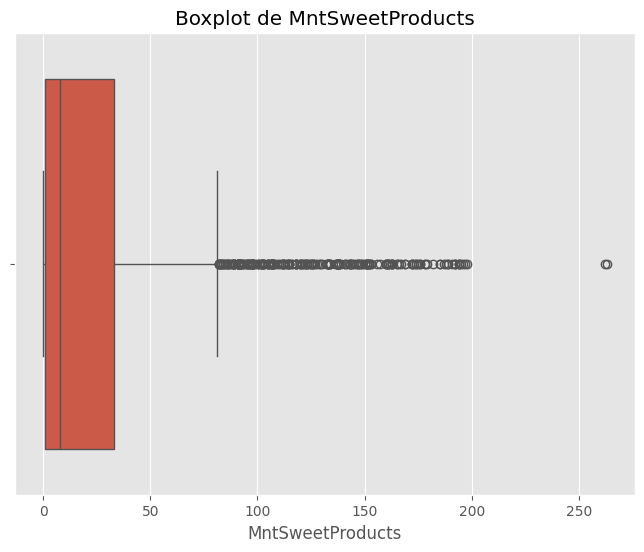

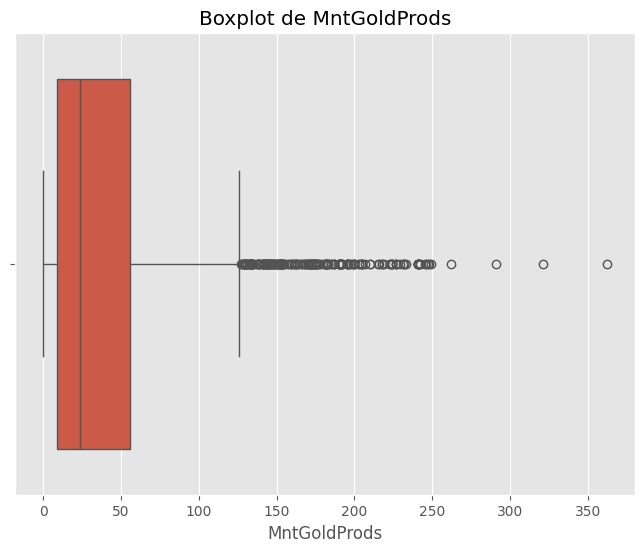

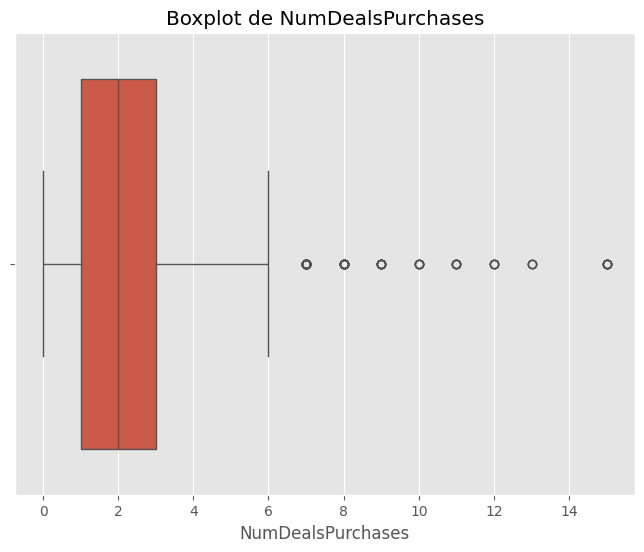

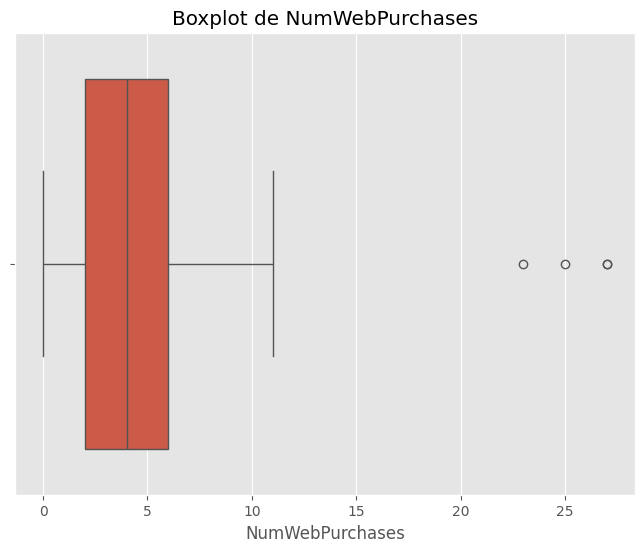

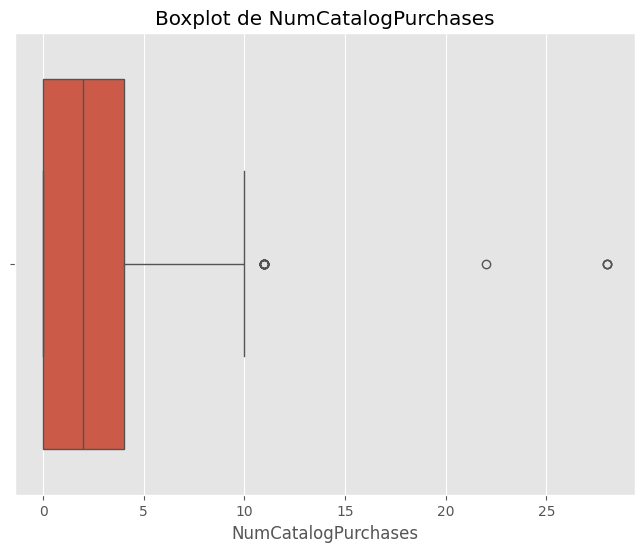

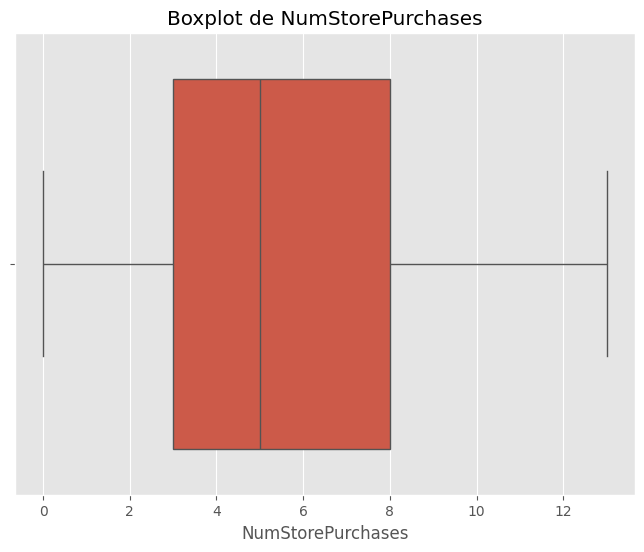

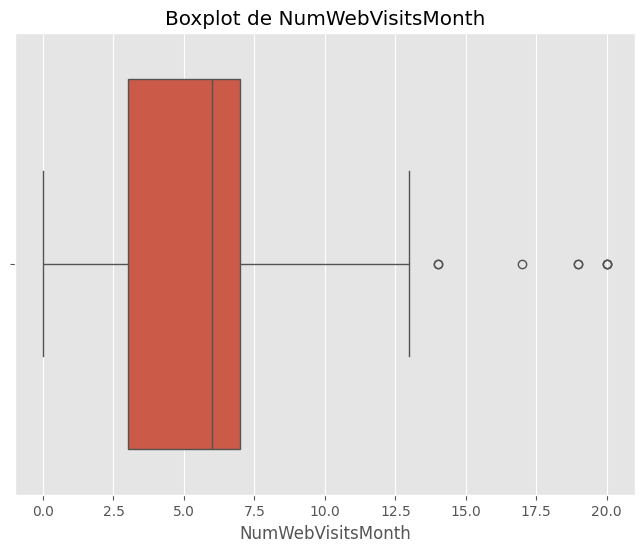

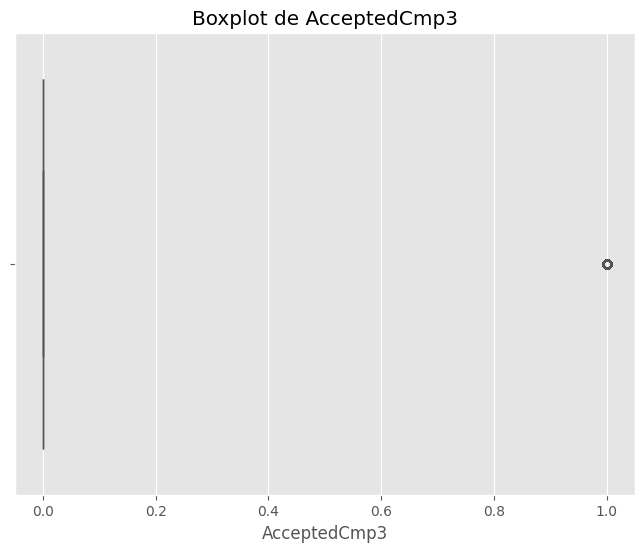

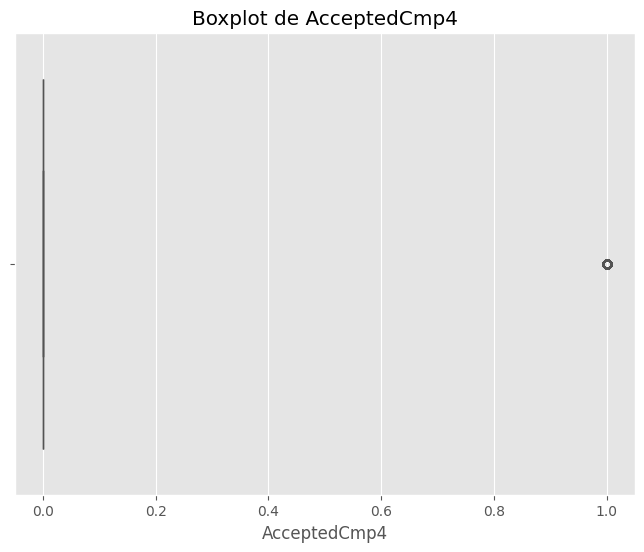

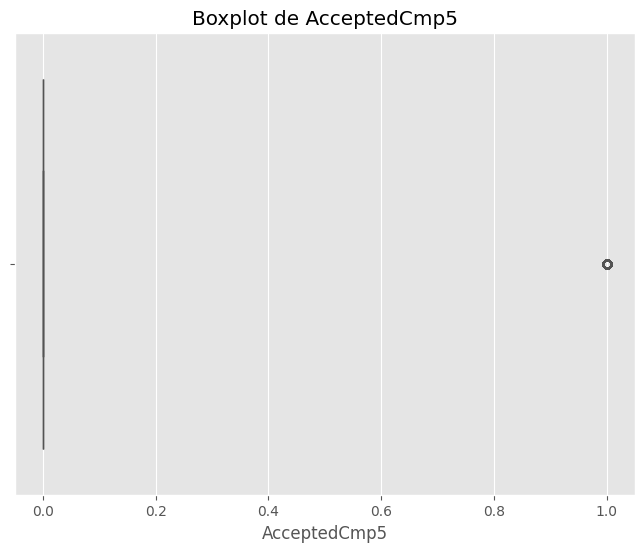

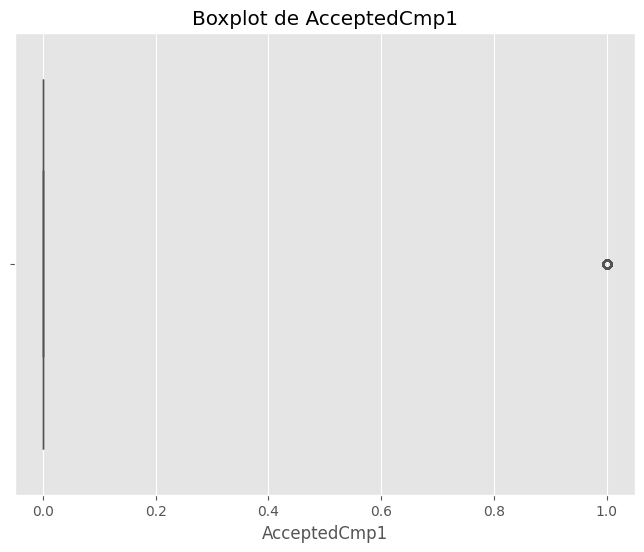

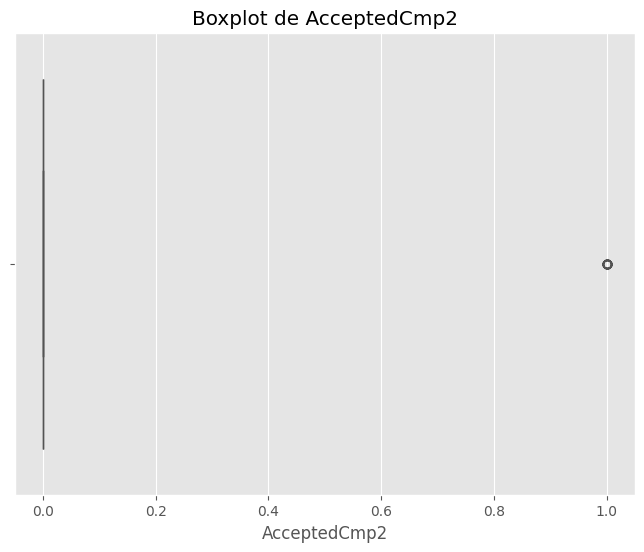

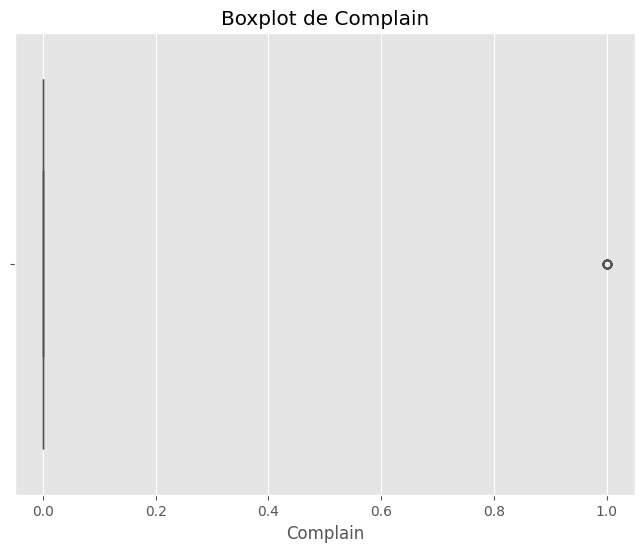

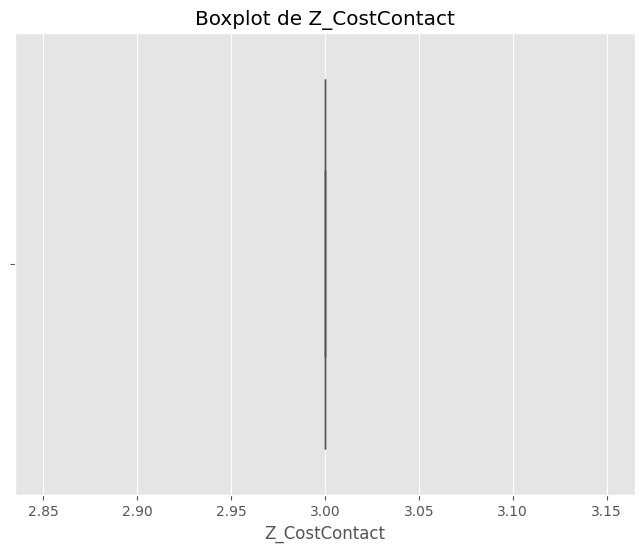

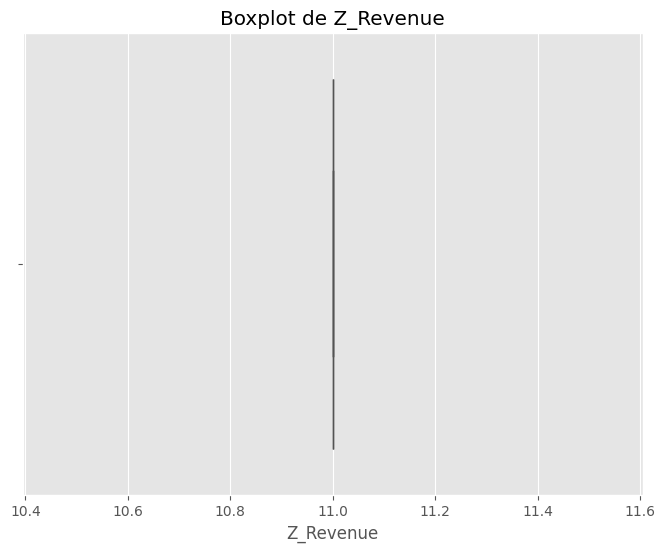

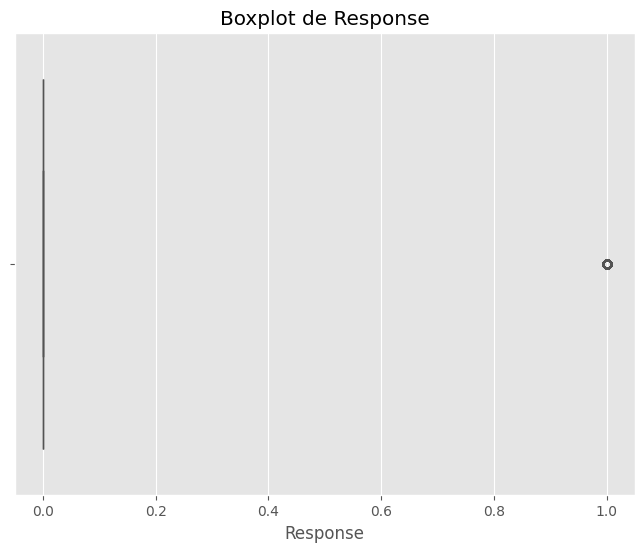

In [28]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()
#

Boxplot de todas las varibles numericas (Valores atipicos):

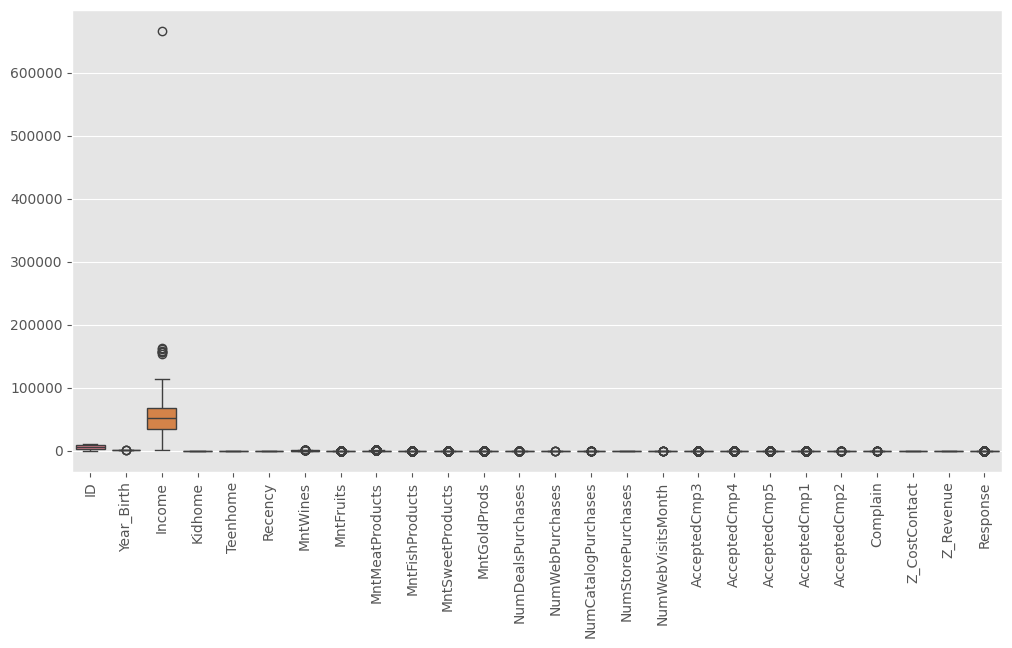

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()

Histograma para distribucion de variables numericas:

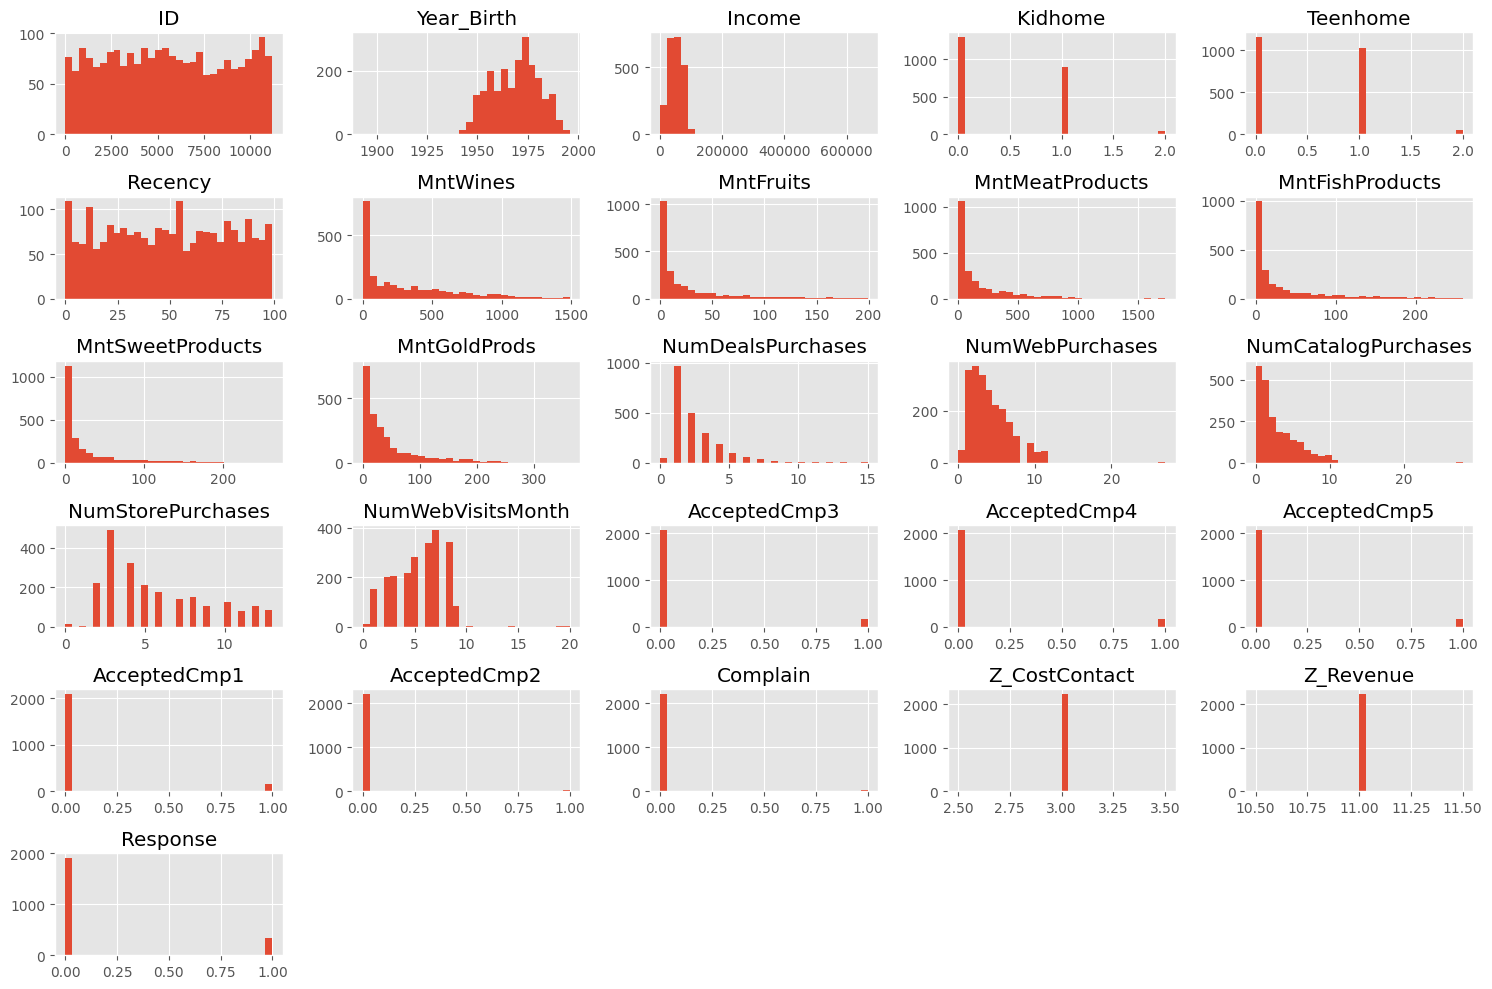

In [37]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Analisis de simetria

In [38]:
df.skew(numeric_only=True)

,0
ID,0.039832
Year_Birth,-0.349944
Income,6.763487
Kidhome,0.635288
Teenhome,0.407115
Recency,-0.001987
MntWines,1.175771
MntFruits,2.102063
MntMeatProducts,2.083233
MntFishProducts,1.919769


Moda de variables categoricas:

In [40]:
modas_categoricas = df.select_dtypes(include=['object']).mode().iloc[0]
print("Moda de variables categoricas: \n", modas_categoricas)

Moda de variables categoricas: 
 Education         Graduation
Marital_Status       Married
Dt_Customer       31-08-2012
Name: 0, dtype: object
